In [100]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

In [101]:
ds

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 41, longitude: 182, time: 311)
Coordinates:
  * depth      (depth) int16 0
  * latitude   (latitude) float32 -46.125 -45.875 -45.625 ... -36.375 -36.125
  * time       (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2018-11-15
  * longitude  (longitude) float32 25.125 25.375 25.625 ... 69.875 70.125 70.375
Data variables:
    mlotst     (time, latitude, longitude) float32 ...
    zo         (time, depth, latitude, longitude) float32 -0.068 ... 0.776
    to         (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    ugo        (time, depth, latitude, longitude) float32 ...
    vgo        (time, depth, latitude, longitude) float32 ...
Attributes:
    title:             ARMOR3D REP - TSHUVMld Global Ocean Observation-based ...
    description:       ARMOR3D REP CMEMS - April 2019 Release
    Conventions:       CF-1.0
    institution:       CLS
    domain_name:       GLO
    hi

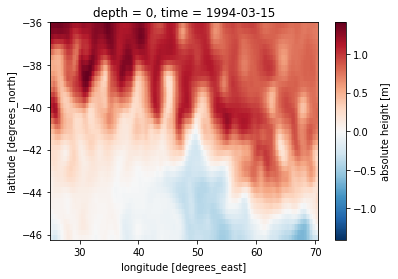

In [118]:
ds = xr.open_dataset('dataset-armor-3d-rep-monthly_1586569819852.nc')
ds.zo.sel(time = '15-03-1994').plot()

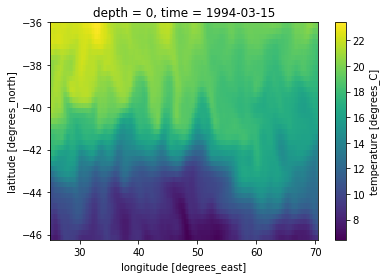

In [119]:
ds.to.sel(time = '15-03-1994').plot()

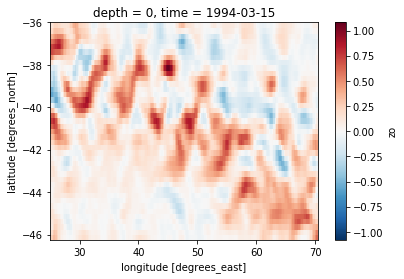

In [103]:
sshgrad = ds.zo.differentiate("latitude")
sshgrad.sel(time = '15-03-1994').plot()

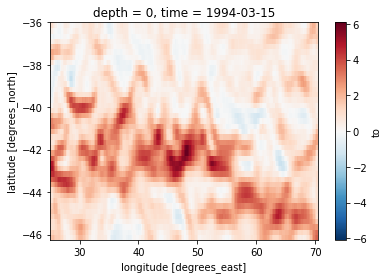

In [120]:
t_grad = ds.to.differentiate("latitude")
t_grad.sel(time = '15-03-1994').plot()

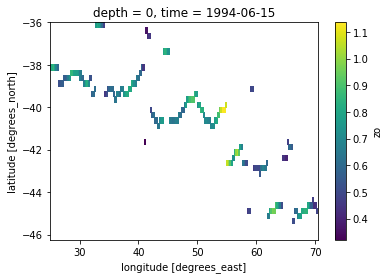

In [104]:
sshgradmax = sshgrad.max("latitude")
sshgradmax
ARC_pos = sshgrad.where(sshgrad == sshgradmax, drop=True)
ARC_pos.sel(time = '1994-06-15').plot()

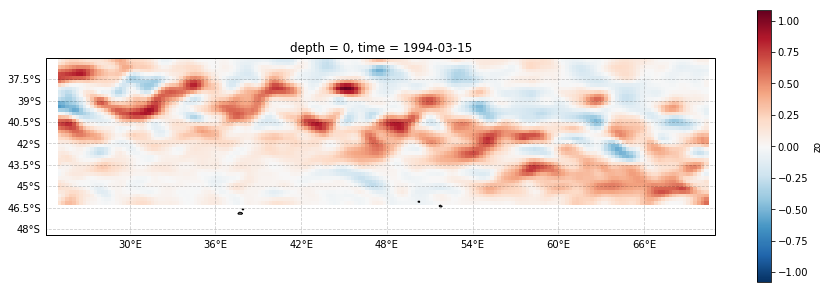

In [105]:
#plot on a nice map
plt.figure(figsize=(15, 5))
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')

ax1 = plt.axes(projection=ccrs.PlateCarree())
feature = ax1.add_feature(coast, edgecolor='black',facecolor='gray')
sshgrad.sel(time = '1994-03-15').plot(transform=ccrs.PlateCarree())
#plt.plot(start_lon, start_lat, color='red', marker='^',markersize = 10,transform=ccrs.PlateCarree())

ax1.set_extent([24.125, 71, -36, -46])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False

In [110]:
# try skewness

SSH_skewness = np.squeeze(stats.skew(ds.zo.sel(time=)))
np.shape(SSH_skewness)

(41, 182)

Text(0, 0.5, 'skewness')

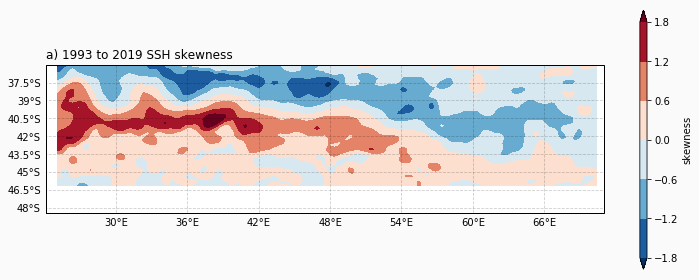

In [116]:
fig = plt.figure(1, figsize=(10,6), facecolor=[0.98,0.98,0.98]) 

levels=np.arange(-0.02,0.02,0.005)
cmap = plt.cm.RdBu_r
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([24.125, 71, -36, -46])
levels=np.arange(-1,1,.1)
plot = plt.contourf(ds.longitude, ds.latitude, SSH_skewness,
            cmap=cmap, extend='both', transform=ccrs.PlateCarree())


ax1.set_title('a) 1993 to 2019 SSH skewness', loc='left')
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False




ax1.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

cbar_ax = fig.add_axes([.95, 0.2, .01, .6]) #left, bottom, width, height
fig.colorbar(plot, cax=cbar_ax, orientation="vertical",extend='both')
plt.ylabel('skewness')